In [1]:
from DeepPoolAI import AerialImage, GridPhotos
import cv2 as cv
import numpy as np
from PIL import Image

#convert opencv image to Pillow image
def cv2pillow(img):
    return Image.fromarray(np.uint8(img))

f = open('key', 'r')
key = f.read()

In [2]:
ai = AerialImage(key = key,zoomLevel=18, height=1000, width=1000)
photo = ai.get_photo(lat=36.2806, long = -115.1626)

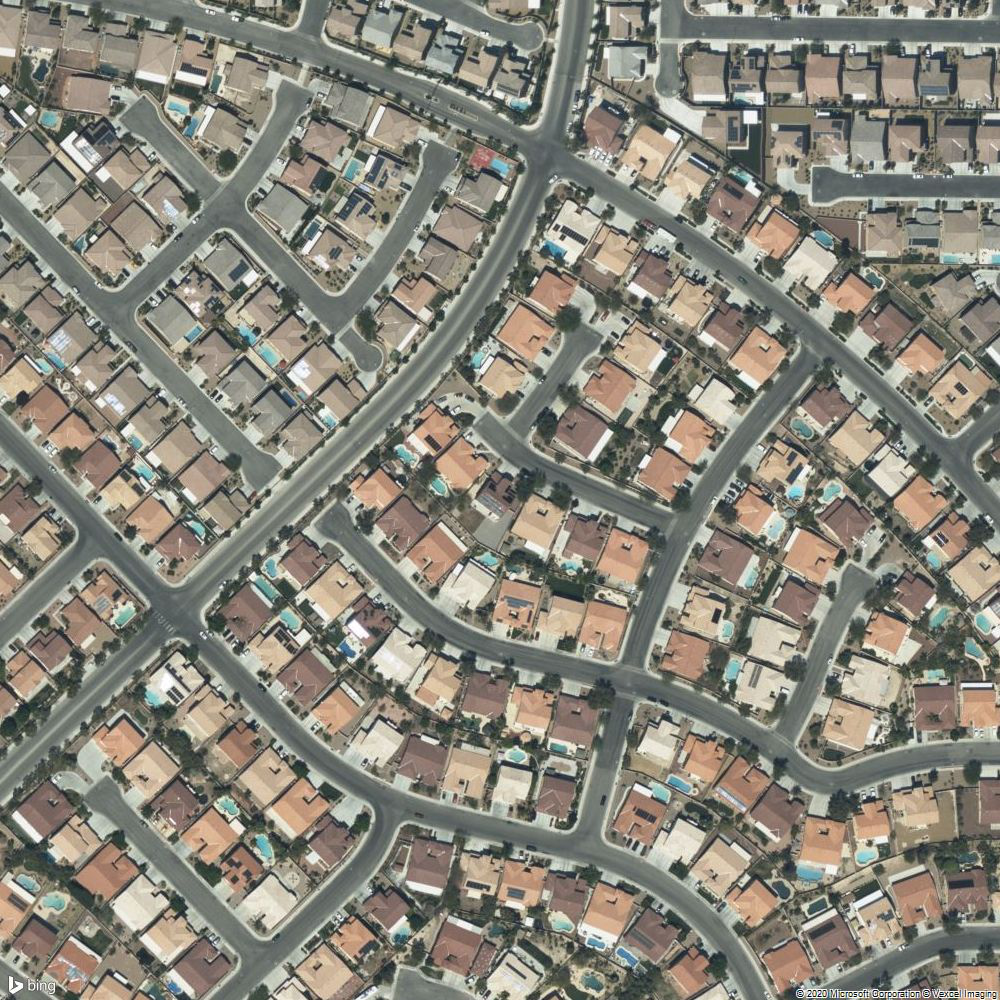

In [3]:
photo

In [4]:
def get_pools(img):
    ref_colors = [{
        'hsv': np.array([85.55029586, 67.23076923, 167.73964497]),
        'radius': np.array([30, 30, 30])
    },
    {
        'hsv': np.array([ 95.473562474846, 73.45679919145016, 84.95061728395059 ]),
        'radius': np.array([10, 10, 10])
    },
    {
        'hsv': np.array([ 90.54043979824111, 63.88068312831349, 103.23456790123457 ]),
        'radius': np.array([15, 10, 10])
    },
    {
        'hsv': np.array([[ 92.83158052601456, 93.71934600803863, 214.28395061728398 ]]),
        'radius': np.array([15, 20, 20])
    }]
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    mask = np.zeros(img.shape[0:2])
    for ref in ref_colors:
        mask += cv.inRange(img_hsv, ref['hsv'] - ref['radius'], ref['hsv'] + ref['radius'])
    mask = np.array(mask > 0, dtype=np.uint8) * 255
    contours, _ = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    boxes = []
    for cont in contours:
        box = [0, 0, 0, 0]
        x = cont[:, 0, 0]
        y = cont[:, 0, 1]
        box = [np.min(x), np.max(x), np.min(y), np.max(y)]
        if box[1] - box[0] > 5 and box[3] - box[2] > 5:
            boxes.append(box)
    return boxes

In [5]:
def print_boxes(img):
    boxes = get_pools(img)
    img_boxes = img
    for box in boxes:
        cv.rectangle(img_boxes, (box[0] , box[2]), (box[1], box[3]), (0, 255, 0), 2)
    return cv2pillow(img_boxes)

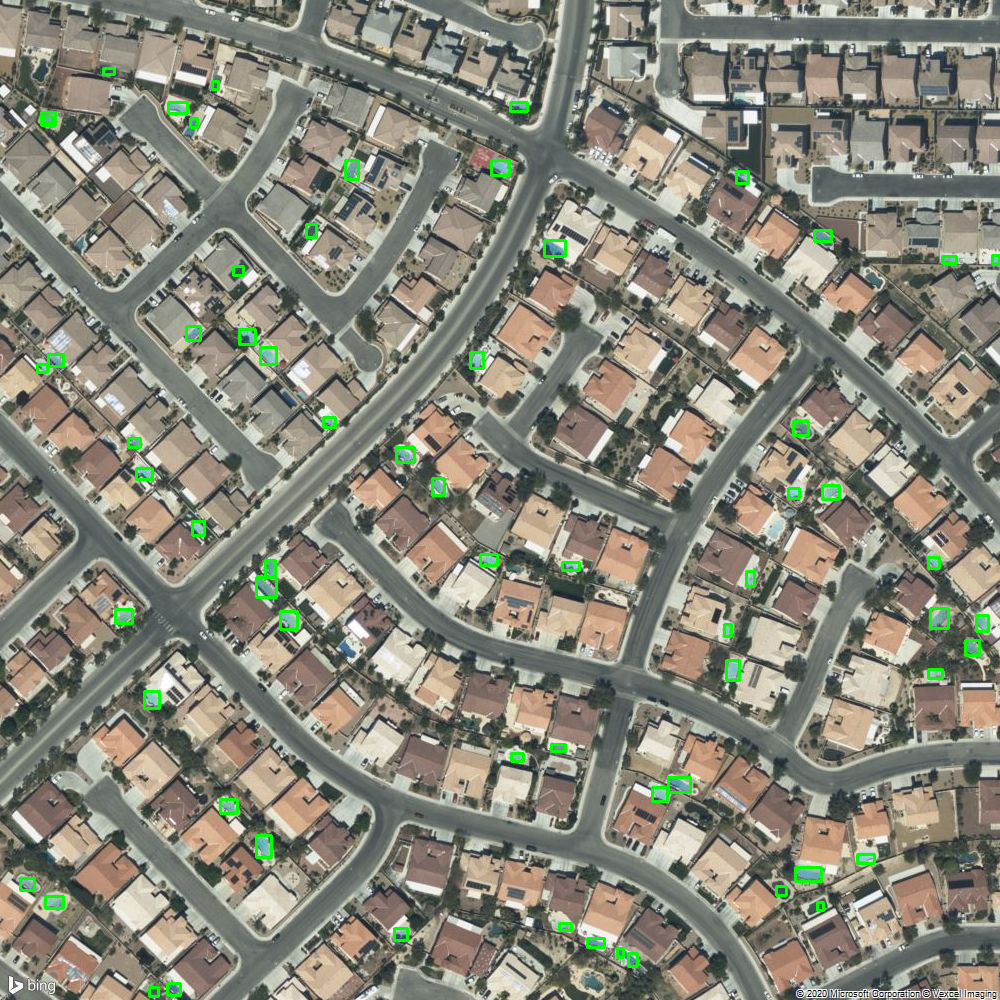

In [6]:
print_boxes(np.array(photo))

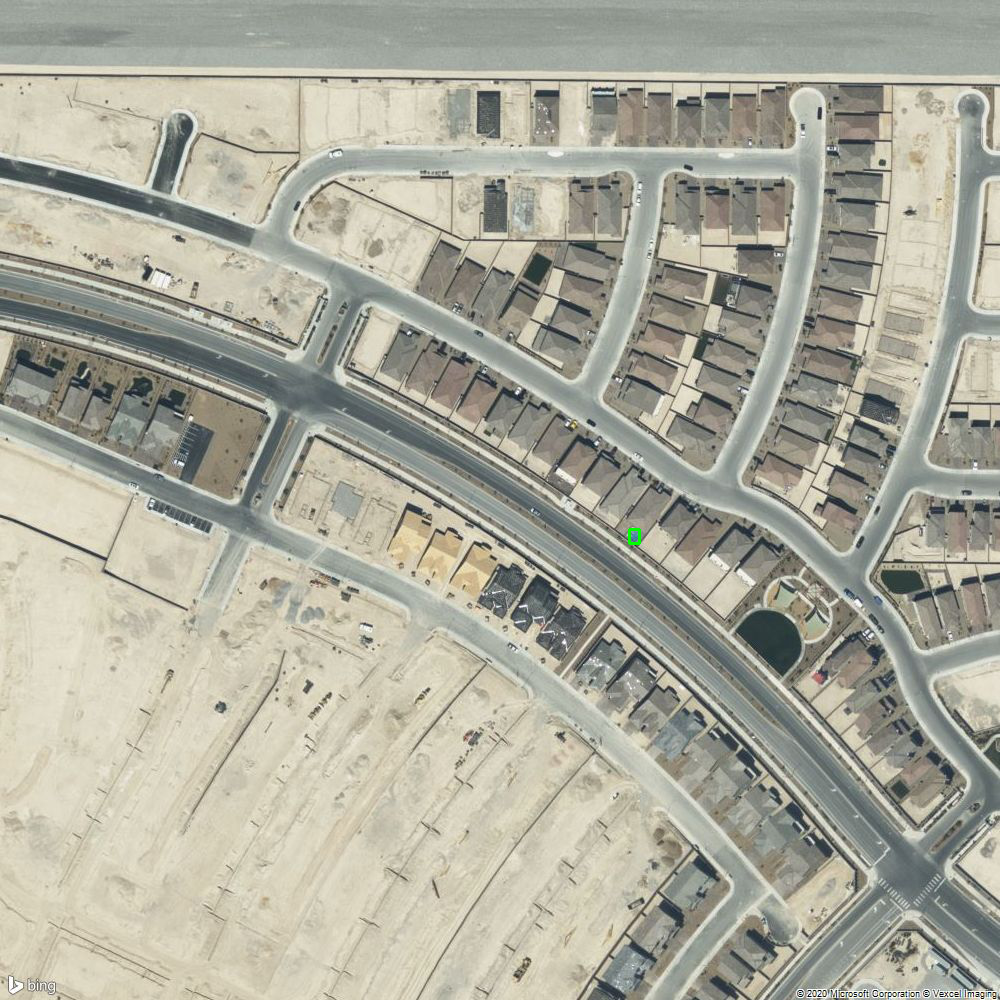

In [7]:
print_boxes(np.array(ai.get_photo(lat=36.2906, long = -115.1626)))

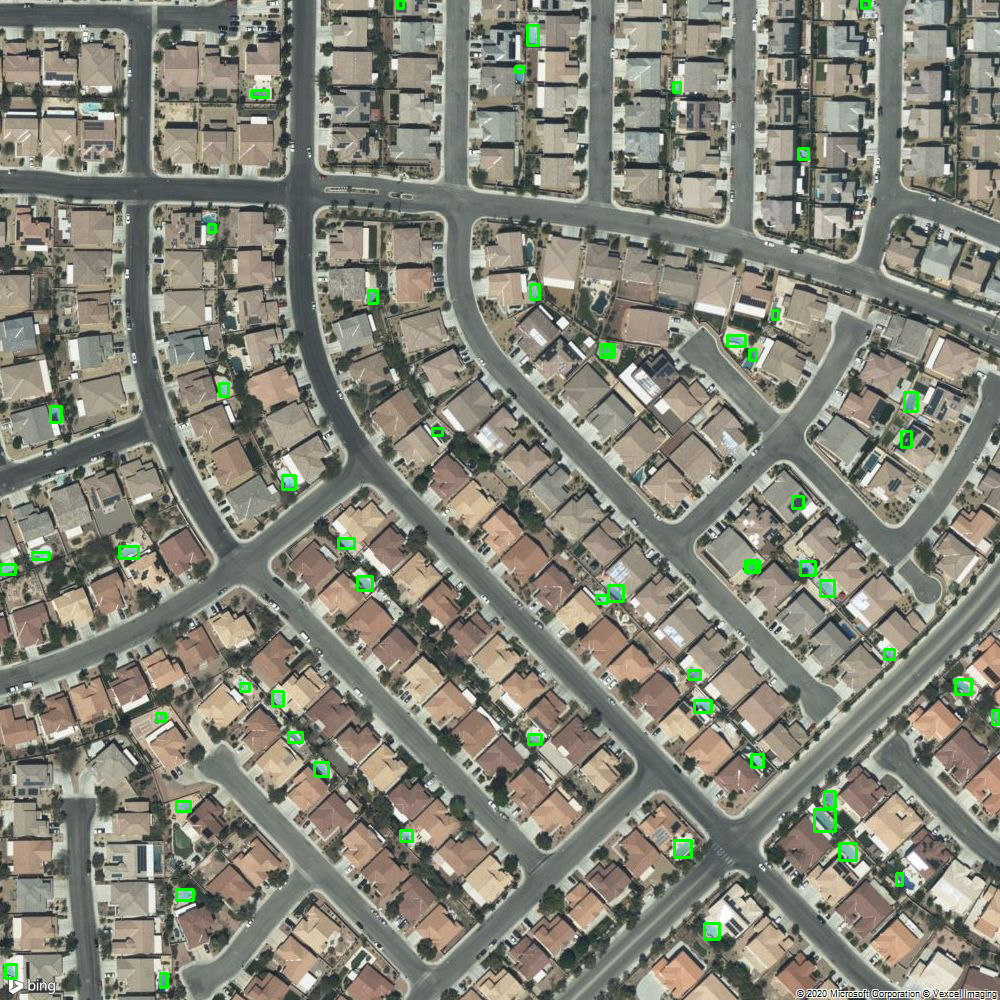

In [8]:
print_boxes(np.array(ai.get_photo(lat=36.2816, long = -115.1656)))